# STEM Image Simulation and Analysis

This notebook demonstrates the process of simulating Scanning Transmission Electron Microscopy (STEM) images from 2D DFT structures using the JARVIS toolkit. We'll walk through the steps of:

1. Loading 2D DFT data
2. Processing atomic structures
3. Generating STEM simulations
4. Visualizing and analyzing the results

## Setup and Imports

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from jarvis.db.figshare import data
from jarvis.core.atoms import Atoms, get_supercell_dims, crop_square
from jarvis.analysis.stem.convolution_apprx import STEMConv

# Load the 2D DFT dataset
print("Loading 2D DFT dataset...")
dft_2d = data('dft_2d')
print(f"Successfully loaded {len(dft_2d)} structures")

Loading 2D DFT dataset...
Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815705


100%|██████████| 8.39M/8.39M [00:00<00:00, 9.93MiB/s]



Loading the zipfile...
Loading completed.
Successfully loaded 1103 structures
Loading completed.
Successfully loaded 1103 structures


## Data Exploration

Let's examine a sample structure from the dataset. We'll look at the 10th structure in detail.

In [3]:
# Select and examine a sample structure
sample_idx = 10
data = dft_2d[sample_idx]

# Display structure information
print("Structure Details:")
print("-" * 50)
print(f"Material ID: {data.get('jid', 'N/A')}")
print(f"Formula: {data.get('formula', 'N/A')}")
print(f"Space Group: {data.get('spacegroup_number', 'N/A')}")
print("\nFull structure data:")
data

Structure Details:
--------------------------------------------------
Material ID: JVASP-676
Formula: Te2Mo
Space Group: N/A

Full structure data:


{'jid': 'JVASP-676',
 'spg_number': '11',
 'spg_symbol': 'P2_1/m',
 'formula': 'Te2Mo',
 'formation_energy_peratom': -0.14204,
 'func': 'OptB88vdW',
 'optb88vdw_bandgap': 0.0,
 'atoms': {'lattice_mat': [[3.4778329262343175, 0.0, 0.0],
   [0.0, 6.358483588462181, 0.0],
   [0.0, 0.0, 33.313518]],
  'coords': [[0.0, 5.4806251804122335, 8.831885238081494],
   [1.738915, 2.252532590805098, 8.25184283171178],
   [1.738915, 4.474489628624973, 4.682134709348086],
   [0.0, 1.3440620146276585, 5.262177931699691],
   [0.0, 3.828553699368643, 6.6607441192869485],
   [1.738915, 6.126528767761345, 6.853535815232071]],
  'elements': ['Te', 'Te', 'Te', 'Te', 'Mo', 'Mo'],
  'abc': [3.47783, 6.35848, 33.31352],
  'angles': [90.0, 90.0, 90.0],
  'cartesian': True,
  'props': ['', '', '', '', '', '']},
 'slme': 'na',
 'magmom_oszicar': 0.004,
 'spillage': 'na',
 'elastic_tensor': 'na',
 'effective_masses_300K': {'p': [0.0, 0.0, 0.01], 'n': [0.0, 0.0, 0.01]},
 'kpoint_length_unit': 75,
 'maxdiff_mesh': 'na

## STEM Image Simulation

Now we'll process the atomic structure and generate a STEM simulation:
1. Convert dictionary to Atoms object
2. Calculate supercell dimensions
3. Create the supercell
4. Crop to desired size
5. Generate STEM simulation

In [4]:
# Process the atomic structure
print("Step 1: Converting to Atoms object...")
atoms = Atoms.from_dict(data["atoms"])

print("\nStep 2: Calculating supercell dimensions...")
dims = get_supercell_dims(atoms=atoms, enforce_c_size=50)
print(f"Supercell dimensions: {dims}")

print("\nStep 3: Creating supercell...")
supercell = atoms.make_supercell_matrix(dims)

print("\nStep 4: Cropping to square...")
cropped = crop_square(supercell, csize=50)

print("\nStep 5: Generating STEM simulation...")
stem_sim = STEMConv(output_size=[200, 200])
stem_image = stem_sim.simulate_surface(atoms=cropped)[0]
print("Simulation complete!")

Step 1: Converting to Atoms object...

Step 2: Calculating supercell dimensions...
Supercell dimensions: [15, 8, 2]

Step 3: Creating supercell...

Step 4: Cropping to square...

Step 5: Generating STEM simulation...
Simulation complete!


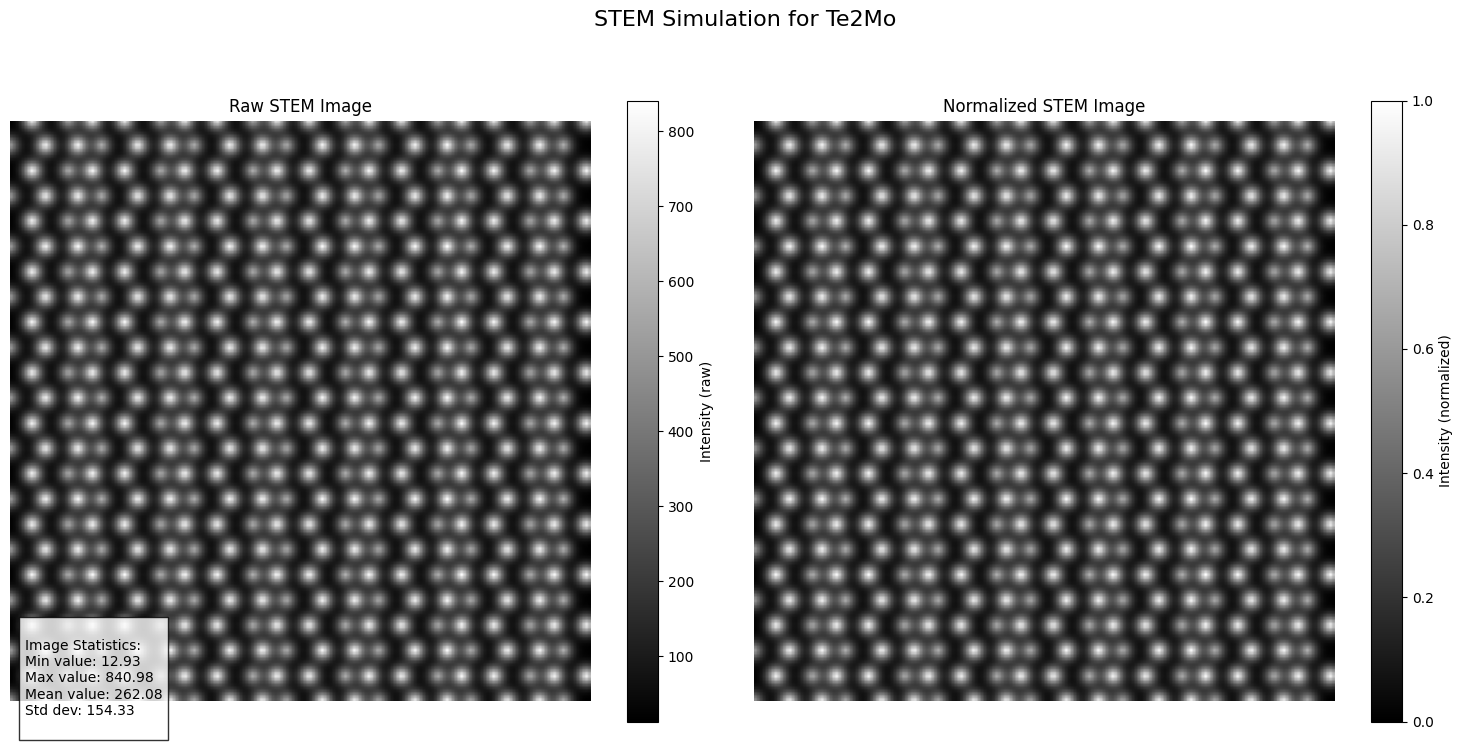


Image shape: (200, 200)
Image dtype: float64
Memory usage: 312.50 KB


In [5]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle(f'STEM Simulation for {data.get("formula", "Material")}', fontsize=16, y=1.05)

# Plot 1: Raw STEM image
im1 = ax1.imshow(stem_image, cmap='gray')
ax1.set_title('Raw STEM Image')
ax1.axis('off')
plt.colorbar(im1, ax=ax1, label='Intensity (raw)')

# Plot 2: Normalized STEM image
img_norm = (stem_image - np.min(stem_image)) / (np.max(stem_image) - np.min(stem_image))
im2 = ax2.imshow(img_norm, cmap='gray')
ax2.set_title('Normalized STEM Image')
ax2.axis('off')
plt.colorbar(im2, ax=ax2, label='Intensity (normalized)')

# Add some statistics
stats_text = f"""
Image Statistics:
Min value: {stem_image.min():.2f}
Max value: {stem_image.max():.2f}
Mean value: {stem_image.mean():.2f}
Std dev: {stem_image.std():.2f}
"""
plt.figtext(0.02, 0.02, stats_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print image shape and details
print(f"\nImage shape: {stem_image.shape}")
print(f"Image dtype: {stem_image.dtype}")
print(f"Memory usage: {stem_image.nbytes / 1024:.2f} KB")